# Explore input data for MIKE SHE Skjern model

Input files to the MIKE SHE model include primarily grid series files (.dfs2) and time series files (.dfs0), both which can be created from existing file formats using the mikeio python package (see [MIKEIO Github Pages](https://dhi.github.io/mikeio/)).

Other parameter inputs, such as constant values, can be inserted directly into the MIKE SHE GUI (Mike Zero) or by editing the model .she file using the MIKE SHE Python API [see MShePy docs](https://docs.mikepoweredbydhi.com/engine_libraries/MShe/MShePyApi/). More information on how to use MShePy can be found in the format_mshe.ipynb tutorial notebook. (TODO)

*List of input files from (`../MapsDK`) and (`../Skjern_Models/Setup`):*

### Model Domain and Grid
- **ID15_oplande_Skjern.shp** — *Catchment shapefile of Skjern*

### Topography
- **dkmj_topo_0.dfs2** — *DEM (500m resolution)*

### Climate
- **DK_DMI_Corr_Precip_10km_1989-2022.dfs2** — *Preciitation rate, Distributed time series [mm/day]*
- **DK_ETref_0.95vest_for_storebaelt_20km_1989-2022.dfs2** — *Reference Evapotranspiration rate, Distributed time series [mm/day]*
- **DK_Ta_20km_1989-2022.dfs2** — *Daily Air Temperature [C]*

### Land Use
- **DK_Landuse_9kl_5cropsCorr_100m_MB500.dfs2** — *Vegeration 2D classification grid codes*
- **DK_2018_Veg_Prop_inv_100m.etv** — *Vegetation property file, Time series (from `../Skjern_Models/Setup`)* 
- **irrigation_depth_class_100m_hav_2_newgeology.dfs2** — *Irrigation well depth codes*
- **License_limitated_irrigation_DK5_50mm.dfs0** — *Irrigation well timeseries [m^3]*
- **crop_map_irrigation_5class_500m.dfs2** — *Irrigation demand - crop irrigation class grid codes*
- **Deficit_factor_5veg_tpl.dfs0** — *Moisture deficit time series [Fraction] (from `../Skjern_Models/Setup`)*

### Rivers, Lakes and Sewers
- **HIP_500m_mh_Skjern_DHI.mhydro** — *MIKE Hydro River Network file (cross sections, river boundary conditions, river shapefiles contained here) (from `../Skjern_Models/Setup`)*
    - **500m_Skjern.xns11** — *Cross section file for MIKE Hydro setup (from `../Skjern_Models/Setup`)*

### Overland Flow
- **dk_manning500m.dfs2** — *Manning number, Distributed*  
- **dk_pavedcoef500m_inv.dfs2** — *Paved area fraction, Distributed*  
- **DK_ID15_opl_ver20_HIP500m.dfs2** — *Drain codes*  

### Unsaturated Flow
- **DK_soil_georeg_250m-50m.dfs2** — *Two-Layer UZ Soil Codes*  
- **DK_ID15_opl_ver20_HIP500m.dfs2** — *Drain codes* 


### Saturated Zone
#### > Geological Layers
- **dkmj_k\*\*\*.dfs2 AND dkmj_kalk50m.dfs2** — *Geologic layer lower level elevation map [m]*  
- **DK456_Kx_Kalk_inv.dfs2** — *Horizontal Hydraulic Conductivity, Distributed (from `../Skjern_Models/Setup`)*  
- **DK456_Kz_Kalk_inv.dfs2** — *Vertical Hydraulic Conductivity, Distributed (from `../Skjern_Models/Setup`)*  

#### > Geological Lenses
J25200 lens
- **dkmj_topo.dfs2** — *Lens upper level elevation map [m]*
- **dkmj_bundjordart.dfs2** — *Lens lower level elevation map [m]*
- **DK_j25200sea_9klasser_3regioner100m_Kx_Inv_500mMB.dfs2** — *Horizontal Hydraulic Conductivity, Distributed (from `../Skjern_Models/Setup`)*
- **DK_j25200sea_9klasser_3regioner100m_Kz_Inv_500mMB.dfs2** — *Vertical Hydraulic Conductivity, Distributed (from `../Skjern_Models/Setup`)*  

Salt lens
- **dkmj_sk1b.dfs2** — *Lens upper level elevation map [m]*
- **dkmj_ss1b.dfs2** — *Lens lower level elevation map [m]*

Sea lens
- **dkmj_hav.dfs2** — *Horizontal extent, distributed*
- **dkmj_topo_0.dfs2** — *Lens upper level elevation map [m]*
- **dkmj_topo.dfs2** — *Lens lower level elevation map [m]*

#### > Computational Layers
- **dkmj_k\*\*\*.dfs2 AND dkmj_top2m.dfs2 AND dkmj_bund.dfs2** — *Computational layer lower level elevation map [m]*  
- **dk_h_mean00_06_lay\*\*.dfs2** — *Initial potential head for each computational layer [m]*
- **DK_internal_boundary_100m_MB.dfs2** — *Internal boundary condition grid codes*


#### > Drainage
- **DrainDepth_dist_500mMB.dfs2** — *Drainage level [m], Distributed (from `../Skjern_Models/Setup`)*  
- **DrainTConst_dist_500mMB.dfs2** — *Drainage time constant (Leakage Coefficient) [per sec], Distributed (from `../Skjern_Models/Setup`)*  
- **DK_ID15_opl_ver20_HIP500m.dfs2** — *Drain codes*  

#### > Pumping Wells
- **DK456_wells2022.wel** — *Well parameter file (Locations, Level, Depth, Well ID)*  



In [7]:
import mikeio
import geopandas as gpd
import tools
import matplotlib.pyplot as plt

# For reading cross section data
import mikeio1d
from mikeio1d import Xns11

In [8]:
filepath = r"..\MapsDK"
filename = filepath + r"\DK_DMI_Corr_Precip_10km_1989-2022.dfs2"

Topography dfs2: <mikeio.Dataset>
dims: (time:1, y:660, x:960)
time: 1990-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=660, nx=960)
items:
  0:  dkmj_topo_0 <Elevation> (meter)


<Axes: title={'center': 'DEM [m]'}, xlabel='[m]', ylabel='[m]'>

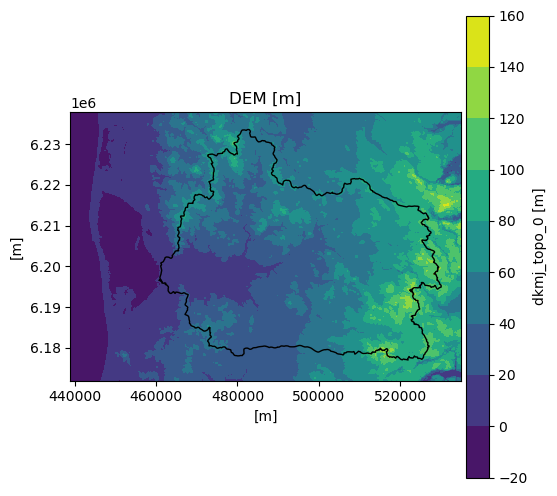

In [9]:
# ---------------------- Topography and Domain ----------------------

fig, ax = plt.subplots(figsize=(6, 6))

# Topography data
topo_dfs2 = mikeio.read(filepath + r"\dkmj0219\dkmj_topo_0.dfs2")
topo_dfs2[0].plot.contourf(title='DEM [m]',ax=ax)
print('Topography dfs2:',topo_dfs2)

# Domain data
domain_shp = gpd.read_file(filepath + r"\DKDomains2013\ID15_oplande_Skjern.shp")
domain_shp.plot(facecolor='none', edgecolor='black',ax=ax)


Precipitation dfs2: <mikeio.Dataset>
dims: (time:12294, y:38, x:32)
time: 1989-01-01 12:00:00 - 2022-08-29 12:00:00 (12294 records)
geometry: Grid2D (ny=38, nx=32)
items:
  0:  P, DMI corr    <Precipitation Rate> (millimeter per day)
Temperature dfs2: <mikeio.Dataset>
dims: (time:12293, y:38, x:32)
time: 1989-01-02 06:00:00 - 2022-08-29 06:00:00 (12293 records)
geometry: Grid2D (ny=38, nx=32)
items:
  0:  Ta             <Temperature> (degree Celsius)
ET dfs2: <mikeio.Dataset>
dims: (time:12293, y:38, x:32)
time: 1989-01-02 06:00:00 - 2022-08-29 06:00:00 (12293 records)
geometry: Grid2D (ny=38, nx=32)
items:
  0:  ETref, *0.95 w <Evapotranspiration Rate> (millimeter per day)


<Axes: title={'center': 'Reference ET (mm/day)'}, xlabel='[m]', ylabel='[m]'>

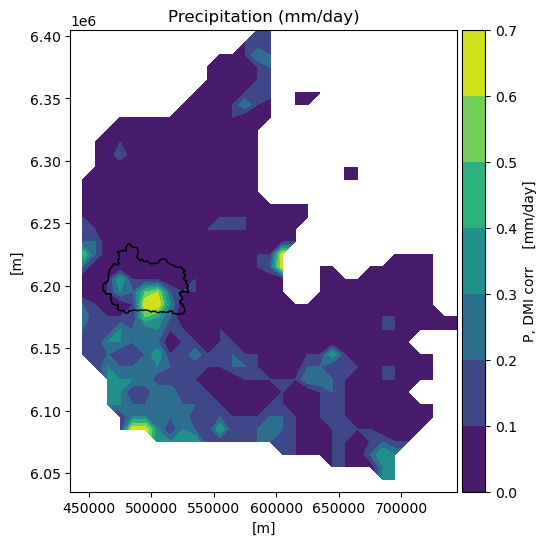

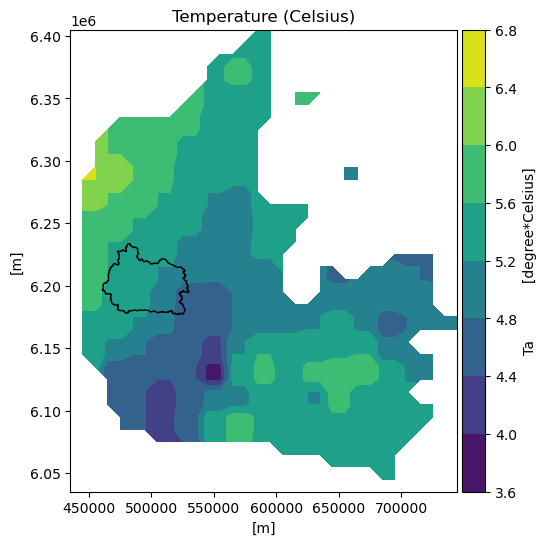

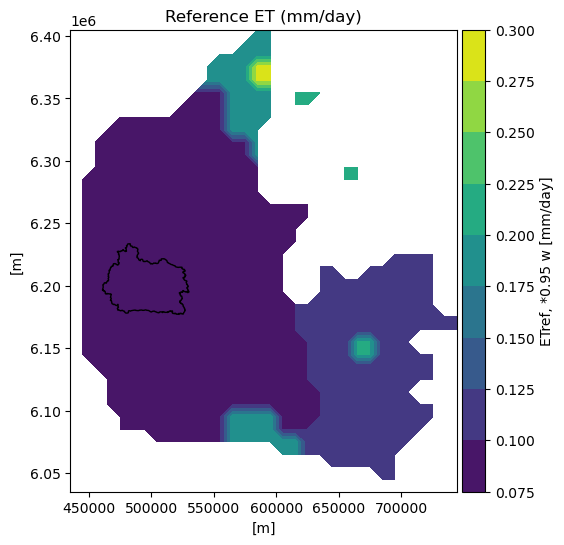

In [10]:
# ---------------------- Plot climate input data ----------------------

# Precipitation data
fig, ax = plt.subplots(figsize=(6, 6))
precip_dfs2 = mikeio.read(filepath + r"\DK_DMI_Corr_Precip_10km_1989-2022.dfs2")
precip_dfs2[0].plot.contourf(title='Precipitation (mm/day)',ax=ax)
print('Precipitation dfs2:',precip_dfs2)
domain_shp.plot(facecolor='none', edgecolor='black',ax=ax)


# Temperature data
fig, ax = plt.subplots(figsize=(6, 6))
temp_dfs2 = mikeio.read(filepath + r"\DK_Ta_20km_1989-2022.dfs2")
temp_dfs2[0].plot.contourf(title='Temperature (Celsius)',ax=ax)
print('Temperature dfs2:', temp_dfs2)
domain_shp.plot(facecolor='none', edgecolor='black',ax=ax)


# ET data
fig, ax = plt.subplots(figsize=(6, 6))
ET_dfs2 = mikeio.read(filepath + r"\DK_ETref_0.95vest_for_storebaelt_20km_1989-2022.dfs2")
ET_dfs2[0].plot.contourf(title='Reference ET (mm/day)',ax=ax)
print('ET dfs2:', ET_dfs2)
domain_shp.plot(facecolor='none', edgecolor='black',ax=ax)


Land use demand dfs2: <mikeio.Dataset>
dims: (time:1, y:660, x:960)
time: 2000-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=660, nx=960)
items:
  0:  2-Grass, 3-Deciduous Forest, 4-Coniferous Forest, 5-Heathland+PoorVegetation, 6-Lake/Stream, 7-Urban, 8-Sea,9-Urban minor, 11-Winter Crop:JB1, 12-Winter Crop:JB2, 13-Winter Crop:JB3-JB4, 14-Winter Crop:JB5-JB10, 21-Spring Crop:JB1, 22-Spring Crop:JB2, 23-Spring Crop:JB3-JB4, 24-Spring Crop:JB5-JB10, 31-Grass:JB1,32-Grass:JB2, 33-Grass:JB3-JB4, 34-Grass:JB5-JB10, 41-Maize:JB1, 42-Maize:JB2, 43-Maize:JB3-JB4, 44-Maize:JB5-JB10, 51-Root Vegetable:JB1, 52-Root Vegetable:JB2, 53-Root Vegetable:JB3-JB4, 54-Root Vegetable:JB5-JB10 <Grid Codes> (Integer)
Irrigation demand dfs2: <mikeio.Dataset>
dims: (time:1, y:750, x:630)
time: 2000-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=750, nx=630)
items:
  0:   <Grid Codes> (Integer)
Moisture deficit dfs0: <mikeio.Dataset>
dims: (time:2192)
time: 2000-01-01 00:00:00 - 2005-12-31 00:00:00

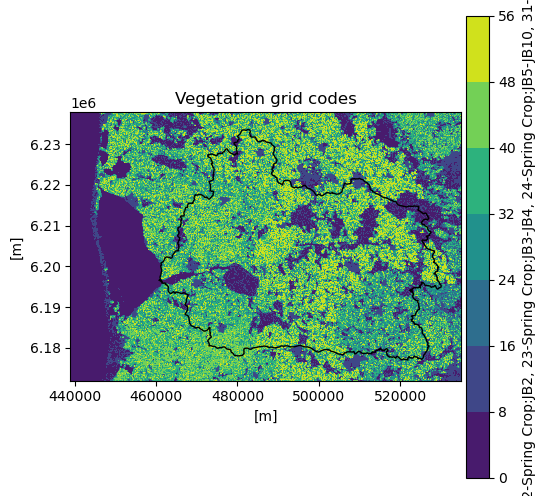

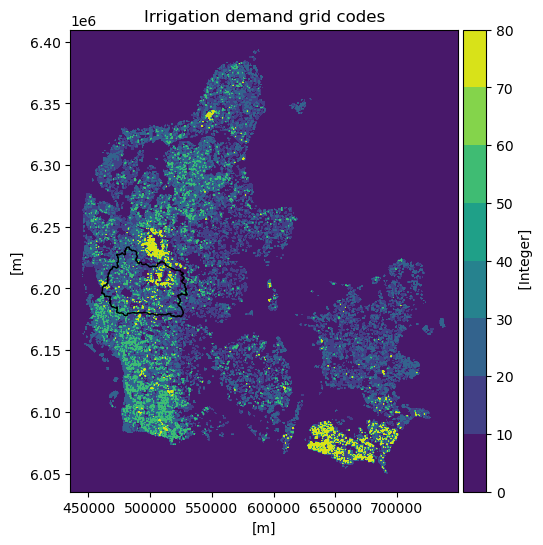

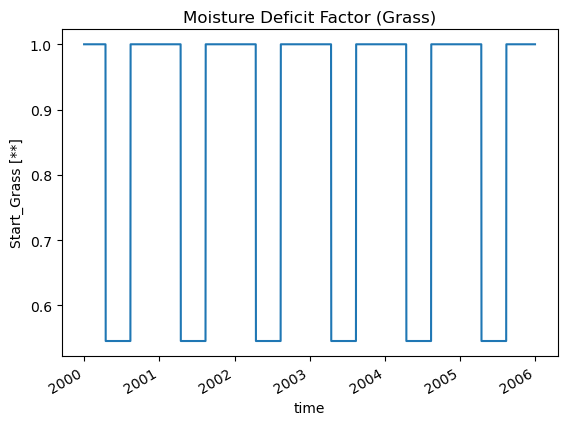

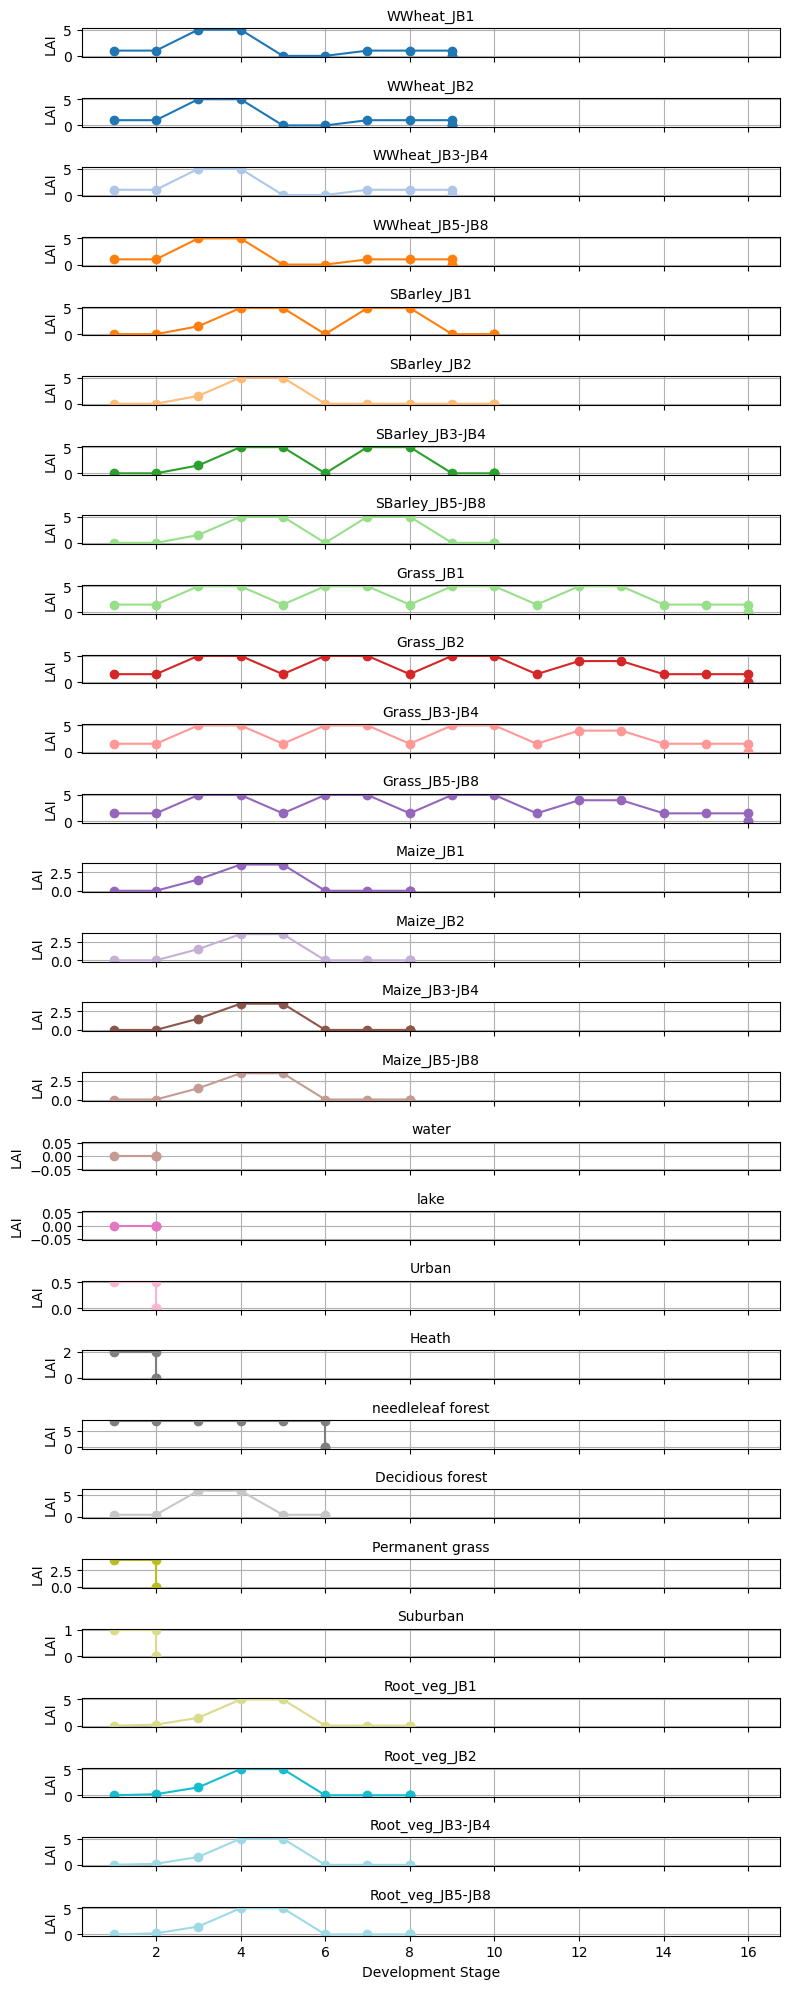

In [11]:
# ---------------------- Plot land cover data ----------------------

# Vegetation grid codes data
fig, ax = plt.subplots(figsize=(6, 6))
landuse_dfs2 = mikeio.read(filepath + r"\DK_Landuse_9kl_5cropsCorr_100m_MB500.dfs2")
landuse_dfs2[0].plot.contourf(title='Vegetation grid codes',ax=ax)
print('Land use demand dfs2:', landuse_dfs2)
domain_shp.plot(facecolor='none', edgecolor='black',ax=ax)


# Irrigation demand data
fig, ax = plt.subplots(figsize=(6, 6))
ID_dfs2 = mikeio.read(filepath + r"\crop_map_irrigation_5class_500m.dfs2")
ID_dfs2[0].plot.contourf(title='Irrigation demand grid codes',ax=ax)
print('Irrigation demand dfs2:', ID_dfs2)
domain_shp.plot(facecolor='none', edgecolor='black',ax=ax)


# Moisture deficit time series data
deficit_dfs0 = mikeio.read(r"..\Skjern_Models\Setup\Deficit_factor_5veg_inv.dfs0")
deficit_dfs0 = deficit_dfs0.sel(time=slice("2000-01-01", "2005-12-31"))
deficit_dfs0['Start_Grass'].plot(title='Moisture Deficit Factor (Grass)')
print('Moisture deficit dfs0:', deficit_dfs0)

# Vegetation properties ETV files
veg_prp_dict = tools.read_plot_etv(r"..\Skjern_Models\Setup\DK_2018_Veg_Prop_inv_100m.etv", variable='LAI', plot=True)

<Axes: title={'center': 'Cross section'}, xlabel='x [meters]', ylabel='z [meters]'>

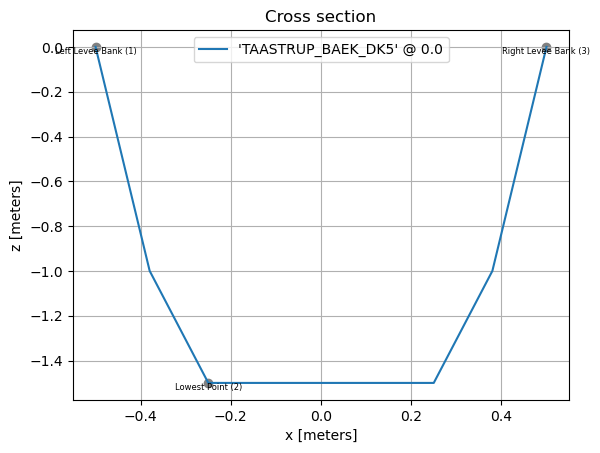

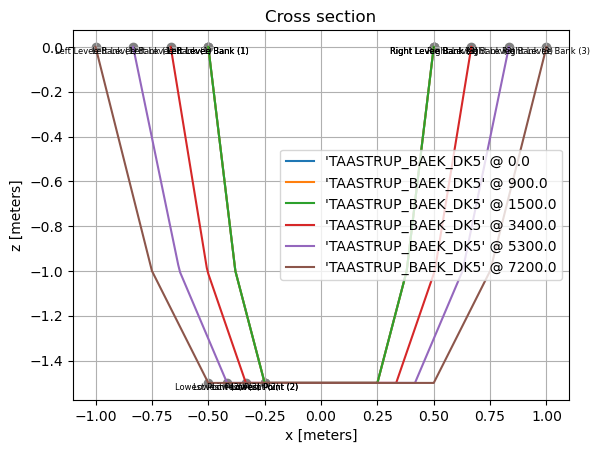

In [12]:
# ---------------------- Plot River network data ----------------------

xns = mikeio1d.open(r"..\Skjern_Models\Setup\500m_Skjern.xns11")
xns['TAASTRUP_BAEK_DK5','0.000', 'NOVANA_MODEL'].plot()
xns.to_dataframe().head()


cross_sections = [*xns['TAASTRUP_BAEK_DK5',..., ...]]
cross_sections = Xns11(cross_sections)
cross_sections.plot()
